# Project: Twitter WeRateDogs Project
 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gather">Data Gathering</a></li>
<li><a href="#Assess">Assessing the data</a></li>
<li><a href="#Clean">Cleaning the Data</a></li> 
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

# Introduction

> The Twitter WeRateDogs project involves collecting data from multiple sources and wrangling them visually and programmatically. The sources are:

* A CSV file already provided by Udacity
* An Image prediction TSV file
* Data obtained from Twitter API / Json file

In [1]:
# import libraries and packages for analysis

import pandas as pd 
import seaborn as sns
import requests
import numpy as np
import re                     #regular expressions
import matplotlib.pyplot as plt
%matplotlib inline

<a id='Gather'></a>

# Data Gathering

#### 1) Enhanced Twitter Archive Data - provided by Udacity as CSV file (twitter-archive-enhanced.csv)

In [2]:
# Load the first dataset obtained by downloading using pandas (twitter_archive_enhanced.csv)
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2) Image Predictions Data - Data can be found [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv). 

Use the get request to write data into a file and read it with pandas.

In [3]:
# load the second dataset programatically using get request

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open('image-predictions.tsv', 'wb') as file:
    content = requests.get(url, stream=True).content
    file.write(content)
    
# read into a dataframe using pandas
img_files = pd.read_csv('image-predictions.tsv', sep="\t")
img_files.head()
    

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3) Download tweet json file option as Twitter developer approval to access the API was a blocker. 

The file was provided as an option by Udacity (tweet-json.txt)

In [4]:
# Using Tweepy to download TL tweets

# import tweepy

# auth = tweepy.OAuth1UserHandler(
  # consumer_key, consumer_secret, access_token, access_token_secret)

# api = tweepy.API(auth)

# public_tweets = api.home_timeline()
# for tweet in public_tweets:
   # print(tweet.text)

In [5]:
# Get the User object for twitter...
# user = api.get_user(screen_name='twitter')

In [6]:
# Load the third dataset from the twitter API / downloaded twitter json file

api_json = pd.read_json('tweet-json.txt', lines=True)
api_json.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


<a id='Assess'></a>

# Assessing the data 

This section focuses on the 3 datasets to check for tidiness and quality issues. 
The instruction was to explore a visual and programatic approach to the task.

Note: Only original tweeets with images and no retweets should be retained.

### Explore each dataset one at a time for tidiness and quality


#### (A) The Twitter Archive Data

In [7]:
# working on the first dataset to gain some perspective on how it is structured(df_tweet)

df_archive.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
df_archive.tail()

# Under the name column we observe different names which seem improper, so lets drill down on this column

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
# For numeric columns statistics 
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Names

In [11]:
dog_names = df_archive.name   # we notice names like None, a, the, an, (this is an issue so we update the list)

In [12]:
dog_names.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Daisy          7
Buddy          7
an             7
Toby           7
Milo           6
Leo            6
Oscar          6
Bella          6
Stanley        6
Rusty          6
Scout          6
Jack           6
Dave           6
Koda           6
Jax            6
Gus            5
            ... 
Bowie          1
Kallie         1
Ferg           1
Rueben         1
Karll          1
Molly          1
Clarq          1
Nico           1
Herb           1
Ron            1
Bobble         1
Comet          1
Julius         1
Kayla          1
Kenzie         1
Rizzo          1
Bradley        1
Gilbert        1
Marty          1
Amy            1
Florence       1
Obi            1
Divine         1
Kathmandu      1
Carbon         1
Billl          1
Apollo         1
Lambeau       

##### Many of the names are proper nouns and hence capitalized. Separate all lowercase data in names column



In [13]:
df_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [14]:
lower_name = df_archive.name.str.contains('^[a-z]', regex=True)   #save all data that matched the criteria

In [15]:
 #Accessing the name column with the separated formatting and getting a count
df_archive[lower_name].name.value_counts() 

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
not              2
actually         2
getting          2
mad              2
such             1
my               1
infuriating      1
all              1
unacceptable     1
by               1
incredibly       1
officially       1
light            1
space            1
his              1
life             1
old              1
this             1
Name: name, dtype: int64

In [16]:
len(df_archive[lower_name])

109

In [17]:
# replace names with lower capitalization with "none"

df_archive.loc[lower_name, 'name'] = "none"

##### Observation: The dog_name and lower_name variable shows gives us two insights ;
    * There's a total of 745 dog names called None - not likely a dog name.
    * There's a total of 109 dog names which are other words that are not likely names for a dog.

#### Accessing Data - We explore the column named "Source" in the dataset

In [18]:
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### The source column show for sources which are: We'll remove the strings and special charaters in the cleaning section

* Twitter for iPhone
* Vine - Make a Scene
* Twitter Web Client
* TweetDeck

#### Accessing Data - We explore the columns named "Doggo", "Floofer", "Puppo" & "Pupper" in the dataset

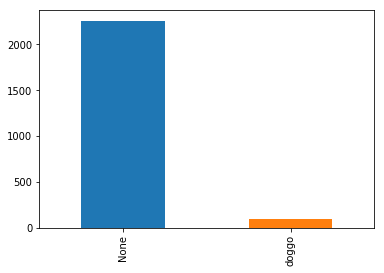

In [19]:
df_archive.doggo.value_counts().plot(kind='bar');

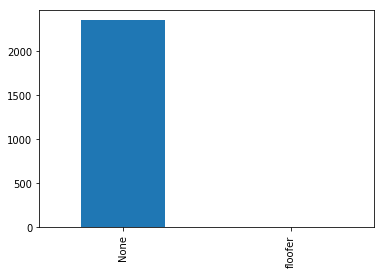

In [20]:
df_archive.floofer.value_counts().plot(kind='bar');

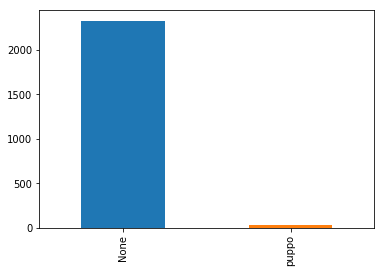

In [21]:
df_archive.puppo.value_counts().plot(kind='bar');

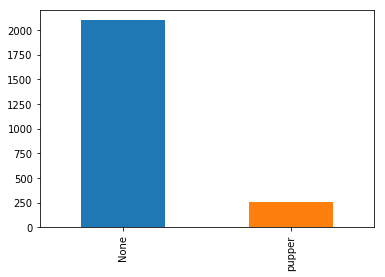

In [22]:
df_archive.pupper.value_counts().plot(kind='bar');

### B) Image Files (img_files)

### Image Predictions File

A tsv file of image predictions (best 3) with each tweet ID, image URL, and the confidence level value that corresponded to the most confident prediction.

The columns include:

* tweet_id: unique tweet identifier
* jpg_url: dog's image
* img_num: image number
* p1: algorithm's #1 prediction for the image in the tweet
* p1_conf confidence level of algorithm in its #1 prediction
* p1_dog: is whether or not the #1 prediction is a breed of dog
* p2: algorithm's #2 prediction for the image in the tweet.
* p2_conf: confidence level of algorithm in #2 prediction
* p2_dog: is whether or not the #2 prediction is a breed of dog
* p3: the algorithm's third most likely prediction
* p3_conf:confidence level of algorithm in its #3 prediction
* p3_dog is whether or not the #3 prediction is a breed of dog

In [23]:
# View dataset

img_files.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [24]:
img_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
img_files['p1_dog'].value_counts()           # Examining each individual predictions

# For the first predictions data, there are 1532 predictions of a dog and 543 that are not

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
img_files['p2_dog'].value_counts() 


# For the second predictions data, there are 1553 predictions of a dog and 522 that are not

True     1553
False     522
Name: p2_dog, dtype: int64

In [27]:
img_files['p3_dog'].value_counts() 

# For the third predictions data, there are 1499 predictions of a dog and 576 that are not

True     1499
False     576
Name: p3_dog, dtype: int64

### C) API JSON DATA

In [28]:
api_json.info()  # preview the json file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [29]:
api_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [30]:
api_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Quality Issues

#### A) Twitter Archive Data

In [31]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Create copies of each dataset before cleaning

In [32]:
clean_archive = df_archive.copy()
clean_predict = img_files.copy()
clean_api = api_json.copy()

<a id='clean'></a>

# Cleaning the Data


#### - Twitter Archive data

### Problem 1: 

#### Define:  

Change data type of tweet_id to string on the copy of twitter archive data

#### Code:

In [33]:
#The tweet_id, a unique identifier is an integer instead of a string/obj type
clean_archive.astype({"tweet_id": str}).dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

#### Test:

In [34]:
clean_archive[['tweet_id']].dtypes

tweet_id    int64
dtype: object

### Problem 2: 

#### Define: Twitter Archive Data - Missing values in Retweet related columns

In [35]:
# select and drop rows with non-null values in the columns related to Retweet that we do not require
rows_rt = clean_archive[clean_archive['retweeted_status_id'].notnull()]

In [36]:
clean_archive.drop(rows_rt.index, axis=0, inplace=True)

#### Test:

In [37]:
# Check to see if they have been dropped
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Problem 3:

#### Define:  Twitter Archive Data - The timestamp column is of string/object data type

#### Code:

In [38]:
# convert to datetime
clean_archive['timestamp'] = pd.to_datetime(clean_archive['timestamp'])

#### Test: 

In [39]:
# Check to see if the change has been made
clean_archive[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 1 columns):
timestamp    2175 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.0 KB


### Problem 4: 

#### Define: Twitter Archive Data - Drop rows relating to replies with null values

#### Code: 

In [40]:
# select and drop rows with non-null values in the columns related to replies
rows_reply = clean_archive[clean_archive['in_reply_to_user_id'].notnull()]
clean_archive.drop(rows_reply.index, axis=0, inplace=True)

#### Test:

In [41]:
# check if it has been dropped
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

### Problem 5: 


#### Define: Drop all columns related to retweet and replies

#### Code:

In [42]:
# drop all columns related to retweet and replies
clean_archive = clean_archive.drop(['retweeted_status_id','retweeted_status_user_id',
                            'retweeted_status_timestamp', 'in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

#### Test:

In [43]:
# check if it has been dropped
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Problem 6:

#### Define: Extract Decimal Dog Ratings within text with regex to the ratings_numerator and ratings_denominator column

#### Code:

In [44]:
decimals = '(\d+\.?\d*)/(\d+\.?\d*)'
clean_archive[['rating_numerator', 'rating_denominator']] = clean_archive['text'].str.extract(decimals)
clean_archive['rating_numerator'] = clean_archive['rating_numerator'].astype(float)
clean_archive['rating_denominator'] = clean_archive['rating_denominator'].astype(float)


#### Test

In [45]:
pd.set_option('display.max_colwidth', 200)   # Handle text truncation

In [46]:
check = clean_archive.loc[clean_archive['tweet_id'] == 786709082849828864]

print(check[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

               tweet_id  \
695  786709082849828864   

                                                                                                                                 text  \
695  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   

     rating_numerator  rating_denominator  
695              9.75                10.0  


### Problem 7: 

#### Define: Twitter Archive Data - Rating Numerator column

#### Code:

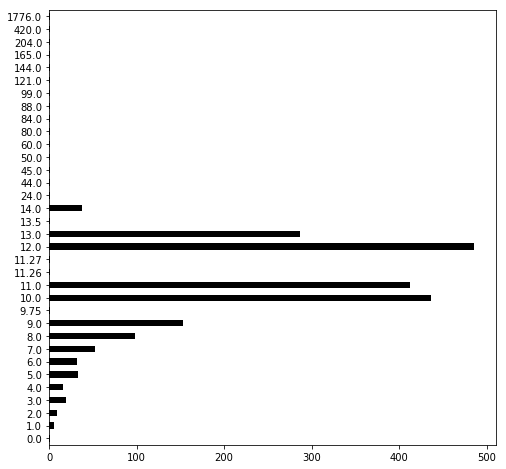

In [47]:
# We remove ratings of numerators higher than 14 as we see from the plot distribution
# rating numerators greater than 14 are out of the band
clean_archive.rating_numerator.value_counts().sort_index().plot(kind='barh', color='black', figsize=(8,8));

In [48]:
# get rows that match the condition
num_14 = clean_archive[clean_archive['rating_numerator'] > 14]

In [49]:
# drop rows that match criteria
clean_archive = clean_archive.drop(num_14.index, axis=0)

#### Test

In [50]:
# check the data
clean_archive[['rating_numerator']].max()

rating_numerator    14.0
dtype: float64

In [51]:
clean_archive.shape 

(2082, 12)

#### There's a total of 2082 rows and 12 columns for the dataset

## Tidiness - Twitter Archive data


#### Define: Twitter Archive Data - Merge the different dog categories to one column

#### Code: 

In [52]:
# check the columns
clean_archive[['doggo', 'floofer', 'pupper', 'puppo']].describe(include='all')

,doggo,floofer,pupper,puppo
count,2082,2082,2082,2082
unique,2,2,2,2
top,None,None,None,None
freq,1999,2072,1852,2058


###### Note:  I find out by replacing with a value, there was string concatenation, hence defeating the purpose

In [53]:
# select all the none values and replace them by " " in the four columns

clean_archive['doggo'].replace('None', "", inplace=True)
clean_archive['floofer'].replace('None', "", inplace=True)
clean_archive['pupper'].replace('None', "", inplace=True)
clean_archive['puppo'].replace('None', "", inplace=True)

# Merge all the columns into a new category

clean_archive['dog_category'] = clean_archive['doggo'] + clean_archive['floofer'] + \
                                clean_archive['pupper'] + clean_archive['puppo']

In [54]:
# check the new column info
clean_archive['dog_category'].value_counts()

                1746
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_category, dtype: int64

In [55]:
# We observe some extra categories by merging the columns : doggopupper, doggopuppo, doggofloofer
# drop the initial four columns for dog stages

clean_archive.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1, inplace=True)

In [56]:
# replace row entries with ' ' by 'NaN' in the dog category column

clean_archive['dog_category'] = clean_archive['dog_category'].replace('', 'none')

#### Test:

In [57]:
clean_archive[['dog_category']].head(20)

,dog_category
0,none
1,none
2,none
3,none
4,none
5,none
6,none
7,none
8,none
9,doggo


### 2) Tidiness Twitter Archive data 

#### Define: Extract the source of tweets 

#### Code:

In [58]:
clean_archive['source'] = clean_archive['source'].str.extract('^<a.+>(.+)</a>$')

#### Test:

In [59]:
# Check
clean_archive['source'].value_counts()

Twitter for iPhone     1950
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

#### B) Problem 8 : Image Prediction data

#### Define: We are interested in only dogs so we set conditions for which all predictions are True for p1_dog, p2_dog, p3_dog

#### Code:

In [60]:
# We create new columns for dog breed and confidence level and using numpy select method based on the condition.

# criteria for hierachial selecting based on each prediction
criteria = [(clean_predict['p1_dog'] == True), (clean_predict['p2_dog'] == True), (clean_predict['p3_dog'] == True)]

# Condition for selection of the predicted breed
breed = [clean_predict['p1'], clean_predict['p2'], clean_predict['p3']]

# selection of confidence level of each one prediction by hierachy
conf_level = [clean_predict['p1_conf'], clean_predict['p1_conf'], clean_predict['p3_conf']]

# create new columns and select breed and confidence level based on criteria
clean_predict['cat_breed'] = np.select(criteria, breed)
clean_predict['conf_value'] = np.select(criteria, conf_level)


#### Test: 

In [61]:
#check the codes
clean_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,cat_breed,conf_value
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


#### we noticed that some of the breeds of dog are still 0, so we drop all rows with 0 value for breed category

In [62]:
clean_predict.drop(clean_predict[clean_predict['cat_breed'] == 0].index, inplace=True)

In [63]:
# we drop the previous columns that were merged and unneccesary columns like img_num and jpg_url
clean_predict.drop(['p1','p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog', 'jpg_url', 'img_num'], axis=1, inplace=True)

## Tidiness

### We merge the cleaned copies of twitter archive data and the image data

In [64]:
final_archive_data = pd.merge(clean_archive, clean_predict, on='tweet_id')

In [65]:
final_archive_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_category',
       'cat_breed', 'conf_value'],
      dtype='object')

In [66]:
final_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 0 to 1653
Data columns (total 11 columns):
tweet_id              1654 non-null int64
timestamp             1654 non-null datetime64[ns]
source                1654 non-null object
text                  1654 non-null object
expanded_urls         1654 non-null object
rating_numerator      1654 non-null float64
rating_denominator    1654 non-null float64
name                  1654 non-null object
dog_category          1654 non-null object
cat_breed             1654 non-null object
conf_value            1654 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 155.1+ KB


### API Json Data

### Problem 9:


#### Define: we only require the tweet_id, retweet_count, favorite_count

#### Code: 

In [67]:
# View the index number and label for each column so we can drop the ones we do not require at once
for i, v in enumerate(clean_api.columns):
    print(i, v)

0 contributors
1 coordinates
2 created_at
3 display_text_range
4 entities
5 extended_entities
6 favorite_count
7 favorited
8 full_text
9 geo
10 id
11 id_str
12 in_reply_to_screen_name
13 in_reply_to_status_id
14 in_reply_to_status_id_str
15 in_reply_to_user_id
16 in_reply_to_user_id_str
17 is_quote_status
18 lang
19 place
20 possibly_sensitive
21 possibly_sensitive_appealable
22 quoted_status
23 quoted_status_id
24 quoted_status_id_str
25 retweet_count
26 retweeted
27 retweeted_status
28 source
29 truncated
30 user


In [68]:
# drop all the columns except index (6,10,25)
clean_api.drop(api_json.iloc[:, np.r_[0:6,7:10,11:25, 26:31]], inplace=True, axis=1)

#### Test: 

In [69]:
# check to test the code
clean_api.head(5)

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


### Problem 10:

#### Define: rename id column to tweet_id

#### Code: 

In [70]:
clean_api.rename({'id': 'tweet_id'}, axis=1, inplace=True)

In [71]:
clean_api.columns

Index(['favorite_count', 'tweet_id', 'retweet_count'], dtype='object')

#### Test:

In [72]:
# rearrange the columns
clean_api = clean_api.iloc[:, [1,0,2]]

In [73]:
clean_api.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


#### Tidiness: 

##### Define: Merge API data with the merged Twitter archive and Image prediction data

#### Code:

In [74]:
final_archive_data = pd.merge(final_archive_data, clean_api, on='tweet_id')

#### Test:

In [75]:
# checking data types of each column before exploratory analysis
final_archive_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category,cat_breed,conf_value,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,none,Chihuahua,0.323581,33819,6514
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,none,Chihuahua,0.716012,25461,4328
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,none,Labrador_retriever,0.170278,42908,8964
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,none,basset,0.555712,41048,9774
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,none,Chesapeake_Bay_retriever,0.425595,20562,3261


#### Further cleaning

In [76]:
# we see the tweet_id as an integer instead of float, so we change the column datatype
final_archive_data['tweet_id'] = final_archive_data['tweet_id'].astype(float, inplace=True)

In [77]:
final_archive_data[['tweet_id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 0 to 1653
Data columns (total 1 columns):
tweet_id    1654 non-null float64
dtypes: float64(1)
memory usage: 25.8 KB


### Store all datasets as three separate CSV files

In [94]:
clean_archive.to_csv('df_archive_master.csv', index=False)

clean_predict.to_csv('img_files_master.csv', index=False)

clean_api.to_csv('api_json_master.csv', index=False)


<a id='EDA'></a>

## Exploratory Data Analysis


##### In this section we answer some questions using the final dataset to get some insights on the data! Here are some questions :

* Which Source is the Most Popular for people who come to rate dogs on WeRateDogs Page?
* Which dog breeds are the most popular on WeRateDogs platform? First top 20
*

### Store the final data from the Gather, Assess and Clean stage

In [95]:
final_archive_data.to_csv('final_archive_data.csv', index = False)

In [96]:
final_archive_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_category',
       'cat_breed', 'conf_value', 'favorite_count', 'retweet_count'],
      dtype='object')

#### Question (1) What are the sources of people who come to rate dogs on WeRateDogs Page?

In [97]:
final_archive_data.source.value_counts()

Twitter for iPhone    1623
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

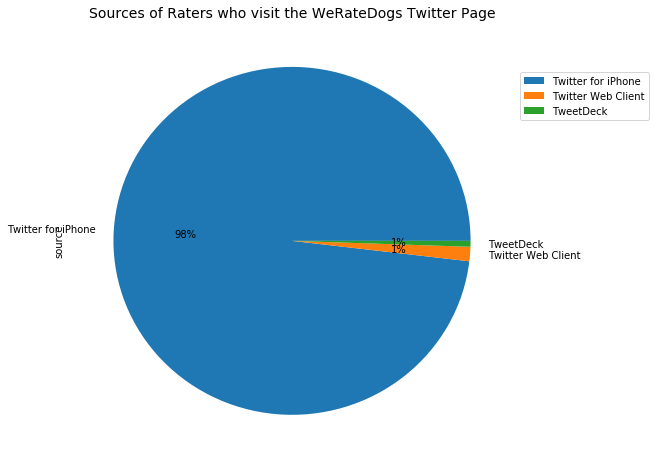

In [115]:
# Visually view these sources with a bar chart

sources_count = final_archive_data.source.value_counts()
sources_count.plot(kind='pie', figsize=(8,8), autopct='%1.0f%%');
plt.title('Sources of Raters who visit the WeRateDogs Twitter Page', size=14);
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left');
# plt.xlabel('Count', size=12)
# plt.ylabel('Devices used by Raters', size=12)

##### The most popular traffic source for raters on the WeRateDogs representing 98%  is : Twitter for iPhone

#### Question (2) Which dog breeds are the most popular on WeRateDogs platform? First top 20

In [116]:
final_archive_data.cat_breed.value_counts()[0:20].sort_values(ascending=False)

golden_retriever             154
Labrador_retriever           103
Pembroke                      94
Chihuahua                     90
pug                           62
toy_poodle                    50
chow                          47
Samoyed                       42
Pomeranian                    41
malamute                      33
French_bulldog                31
Chesapeake_Bay_retriever      31
cocker_spaniel                30
miniature_pinscher            24
Eskimo_dog                    22
German_shepherd               21
Cardigan                      21
beagle                        20
Staffordshire_bullterrier     20
Shih-Tzu                      20
Name: cat_breed, dtype: int64

Text(0.5,1,'Top 20 Dogs by tweets on WeRateDogs Page')

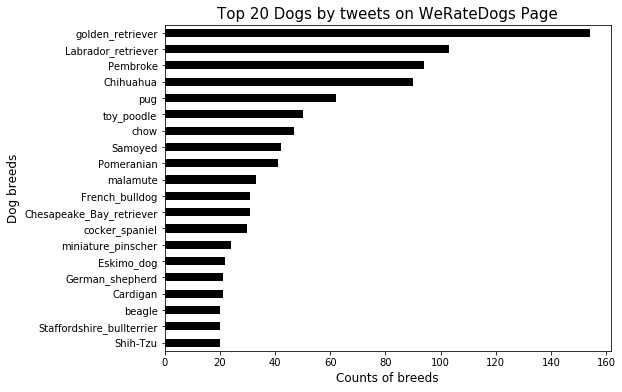

In [117]:
# Visualize insight

top_breeds = final_archive_data.cat_breed.value_counts()[0:20].sort_values(ascending=True)
top_breeds.plot(kind='barh', figsize=(8,6), color='black')
plt.xlabel('Counts of breeds', size=12)
plt.ylabel('Dog breeds', size=12)
plt.title('Top 20 Dogs by tweets on WeRateDogs Page', size=15)

#### The golden retriever is the top most rated dog by raters!

#### Question (3) What are the most common ratings for dogs by WeRateDogs visitors?


Text(0.5,1,'Distribution of various rating scores by WeRateDogs visitors')

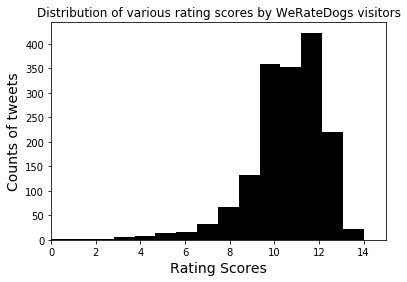

In [118]:
# We use a histogram to visualize the distribution of ratings by WeRateDogs visitors

raters = final_archive_data['rating_numerator']
raters.plot(kind='hist', color='black', bins=15);
plt.xlabel('Rating Scores', size=14)
plt.ylabel('Counts of tweets', size=14)
plt.xlim(0, 15)
plt.title('Distribution of various rating scores by WeRateDogs visitors')

In [119]:
final_archive_data[['rating_numerator']].describe()

,rating_numerator
count,1654.000000
mean,10.811233
std,1.801897
min,0.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,14.000000


#### The distribution of ratings is skewed to the left:

* 12 being the most rated number with a total tweet count above 400
* Average rating is a score of 10
* Highest rating is a score of 14

#### Question (4) What is the monthly interaction or engagement on WeRateDogs

In [120]:
final_archive_data['engagements'] = final_archive_data['retweet_count'] + final_archive_data['favorite_count'] 

In [121]:
engagements_per_month = final_archive_data.groupby(final_archive_data['timestamp'].dt.to_period('M'))['engagements'].mean()

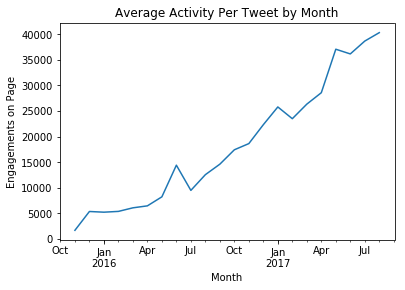

In [122]:
engagements_per_month.plot()
plt.title('Average Activity Per Tweet by Month')
plt.xlabel('Month')
plt.ylabel('Engagements on Page');

#### We observe an increasing monthly trend of tweet engagements from 2016 to 2017

### Question (5) What is the correlation between ratings and other variables?

##### Bivariate Analysis

In [125]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


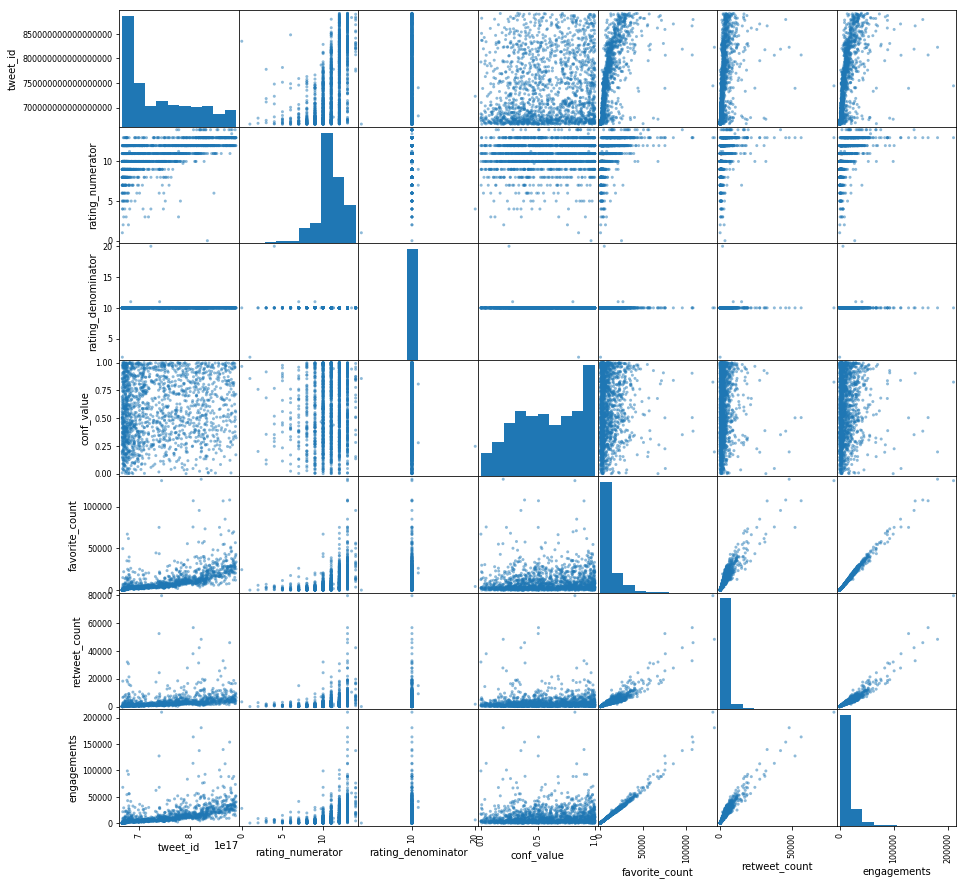

In [126]:
# check correlated variables using scatter matrix
pd.plotting.scatter_matrix(final_archive_data, figsize=(15,15));

#### We see correlations between favorites counts, retweet counts, rating numerator. Time to go deeper

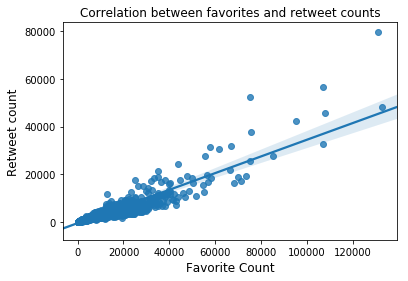

In [88]:
g = sns.regplot(y="retweet_count", x="favorite_count", data=final_archive_data);
plt.title('Correlation between favorites and retweet counts');
plt.xlabel('Favorite Count', size=12);
plt.ylabel('Retweet count', size=12);

#### We see a positive correlation between favorite and retweet counts; The more people retweeted a post the more they appeared to be liked and vice versa

### Ratings vs Retweet counts & Favorite counts vs Ratings

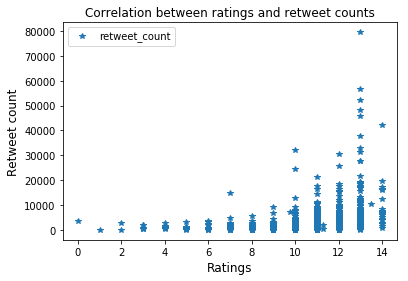

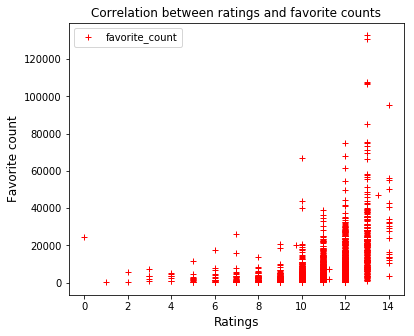

In [89]:
final_archive_data.plot(y="retweet_count", x="rating_numerator", style='*');
plt.title('Correlation between ratings and retweet counts');
plt.xlabel('Ratings', size=12);
plt.ylabel('Retweet count', size=12);


final_archive_data.plot(y="favorite_count", x="rating_numerator", style='+', color='red', figsize=(6,5));
plt.title('Correlation between ratings and favorite counts');
plt.xlabel('Ratings', size=12);
plt.ylabel('Favorite count', size=12);